# The benchmark testing for KDD Cup Dataset
In this notebook, the general steps of classification procedure is presented. Two methods (Random Foreast and Neural Network) are going to be exploited for the problem of attack identification and detection with the existing dataset - KDDCup'99. This notebook shows the way to program with Tensorflow, SKLearn, NumPy and Matplotlib. 

## Data Engineering

### Environment SetUp
If the enviroment is not ready for the procedure, install all the general toolkits to the enviorment. If the enviornment is ready, skip this step.

In [ ]:
#! pip3 install numpy
#! pip3 install pandas
#! pip3 install -U scikit-learn
#! pip3 install graphviz
#! pip3 install pydotplus

### General SetUp
First of all, we import all the needed libraries to the kernel.

In [34]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from IPython.display import Image
import pydotplus
import math
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Second, load the data into the kernel. pd.read_csv() loads the dataset from the csv file and returns a dataframe structure. It could be utilized in the following steps. The required parameters in pd.read_csv() include the path to the dataset, the used coloumns and so on.

In [2]:
data_path = "../../../Dataset/kddcup99.csv"

dataset = pd.read_csv(data_path, sep=',', usecols=range(0, 42))

print("Dataset Shape:", dataset.shape)

Dataset Shape: (494020, 42)


Show the whole dataset.

In [3]:
dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.00,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.00,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,normal
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,normal
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.00,0.00,0.00,0.0,normal
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.00,0.00,0.00,0.0,normal
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.00,0.00,0.00,0.0,normal
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.00,0.00,0.00,0.0,normal


### Start the pre-training SetUp
Divide the dataset into two types, one is the collection of features (input_x) and the other is the labels (input_y). There are 41 features and 5 classes. Using Sklearn's train_test_split() to split 20% of data into testing set and the rest is assigned as training set. 

In [4]:
input_x = dataset.iloc[:, 0:41]
input_y = dataset.iloc[:, 41]

train_x, test_x, train_y, test_y = train_test_split(input_x, input_y, test_size=0.20)

Categorize the attack type into two classes: normal and abnormal. Here, we only detect the malicious network traffic. The pre-defined array of new class is ready for the replacement. 

In [5]:
new_class = {'back':'abnormal', 'buffer_overflow':'abnormal', 'ftp_write':'abnormal', 'guess_passwd':'abnormal', 'imap':'abnormal',
            'ipsweep':'abnormal', 'land':'abnormal', 'loadmodule':'abnormal', 'multihop':'abnormal', 'neptune':'abnormal', 'nmap':'abnormal',
            'perl':'abnormal', 'phf':'abnormal', 'pod':'abnormal', 'portsweep':'abnormal', 'rootkit':'abnormal', 'satan':'abnormal',
            'smurf':'abnormal', 'spy':'abnormal', 'teardrop':'abnormal', 'warezclient':'abnormal', 'warezmaster':'abnormal'}
train_y = train_y.replace(new_class)
test_y = test_y.replace(new_class)

### Data Encoding
Transfer the features and label into representative numbers. Here we need the support from SkLearn library.

In [6]:
from sklearn import preprocessing

In [7]:
train_y

380707    abnormal
325743    abnormal
403794    abnormal
181822    abnormal
142348      normal
278468    abnormal
47960     abnormal
40822       normal
334725    abnormal
107790      normal
369987    abnormal
168594    abnormal
428968    abnormal
455943      normal
392363    abnormal
140015      normal
190352    abnormal
374440    abnormal
129029    abnormal
128435    abnormal
375197    abnormal
382799    abnormal
320221    abnormal
219564    abnormal
76753       normal
84487       normal
243010    abnormal
112678    abnormal
44652     abnormal
318072    abnormal
            ...   
459440      normal
422123    abnormal
462532    abnormal
28397       normal
47642     abnormal
365823    abnormal
363232    abnormal
157772    abnormal
75761       normal
257826    abnormal
124960    abnormal
39250       normal
203266    abnormal
268123    abnormal
105693      normal
257970    abnormal
164152    abnormal
43737     abnormal
14987       normal
206475    abnormal
284722    abnormal
45215     ab

Encode the label of training and testing set by using Sklearn.preprocessing.LabelEncoder() in order to make the data all in the representative way.

In [8]:
le_y = preprocessing.LabelEncoder()
le_y.fit(train_y)
train_y = le_y.transform(train_y)
test_y = le_y.transform(test_y)

Not only encoding the label but also the features. Need to column by column to transform the value. 

In [9]:
for col in train_x.columns:
    if train_x[col].dtype == type(object):
        le_x = preprocessing.LabelEncoder()
        le_x.fit(train_x[col])
        train_x[col] = le_x.transform(train_x[col])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [10]:
for col in test_x.columns:
    if test_x[col].dtype == type(object):
        le_x = preprocessing.LabelEncoder()
        le_x.fit(test_x[col])
        test_x[col] = le_x.transform(test_x[col])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


## 1. Decision Tree
Start trainning with Decision Tree Classifier.

In [13]:
from sklearn import tree
start_time = time.time()
clf = tree.DecisionTreeClassifier()
dt = clf.fit(train_x, train_y)
rtime_DT = time.time() - start_time
print(rtime_DT)

1.1148312091827393


Draw the decision tree by using "graphviz" and save the graph to png.

In [ ]:
import graphviz 
tree_data = tree.export_graphviz(clf, out_file=None)  
graph = pydotplus.graph_from_dot_data(tree_data)  
Image(graph.create_png())
graph.write_png("tree.png") 

In [14]:
ac_DT = clf.score(test_x, test_y)
print(ac_DT)

0.9996761264726124


In [ ]:
prid = clf.predict(test_x)
print(confusion_matrix(prid, test_y))

## 2. Random Forest Classifier
Start trainning with random forest classifier.

In [15]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_x, train_y)
rtime_RF = time.time() - start_time
print(rtime_RF)

14.672898769378662


In [16]:
print(clf.feature_importances_)
ac_RF = clf.score(test_x, test_y)
print(ac_RF)

[3.25430530e-03 3.78055760e-02 3.68626883e-02 2.50590450e-02
 6.38440501e-02 1.37830444e-01 5.77150411e-06 2.53014372e-03
 1.41490749e-05 9.07619580e-03 7.70080633e-05 5.59586292e-02
 5.23990902e-03 5.36376885e-05 4.02779256e-06 4.76336942e-05
 4.81996985e-05 2.31753757e-05 5.33913061e-05 0.00000000e+00
 0.00000000e+00 6.33665537e-04 2.08135696e-01 7.01562525e-02
 4.97526159e-03 2.65307328e-03 2.91024030e-03 2.79053370e-03
 4.47585269e-02 1.97473972e-02 1.58550996e-02 6.05576568e-02
 1.75260435e-02 3.76134461e-02 1.78719589e-02 3.62087243e-02
 6.78124417e-02 3.04662104e-03 4.04566762e-03 3.03630098e-03
 1.87741172e-03]
0.9998178211408445


In [ ]:
prid = clf.predict(test_x)
print(confusion_matrix(prid, test_y))

## 3. Support Vector Machine (SVM) Classifier
Start trainning with SVM classifier

In [17]:
from sklearn.svm import LinearSVC
start_time = time.time()
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(train_x, train_y)
rtime_SVM = time.time() - start_time
print(rtime_SVM)

74.27670502662659


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [18]:
ac_SVM = clf.score(test_x, test_y)
print(ac_SVM)

0.9883000688231246


In [ ]:
prid = clf.predict(test_x)
print(confusion_matrix(prid, test_y))

## 4. KNN Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(train_x, train_y)
rtime_KNN = time.time() - start_time
print(rtime_KNN)

439.552610874176


In [20]:
ac_KNN = clf.score(test_x, test_y)
print(ac_KNN)

0.9996862475203433


In [ ]:
prid = clf.predict(test_x)
print(confusion_matrix(prid, test_y))

## 5. Naive Bayes Classifier 

In [25]:
from sklearn.naive_bayes import GaussianNB
start_time = time.time()
clf = GaussianNB()
clf.fit(train_x, train_y)
rtime_NN = time.time() - start_time
print(rtime_NN)

0.5926272869110107


In [26]:
ac_NN = clf.score(test_x, test_y)
print(ac_NN)

0.9788571312902312


In [35]:
prid = clf.predict(test_x)
print(confusion_matrix(prid, test_y))

[[77468   341]
 [ 1748 19247]]


## Result Comparision

Draw a confusion matrix to see the FP, FN, TP, TN.

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(prid, test_y))

Plot a figure of accuracy comparision.

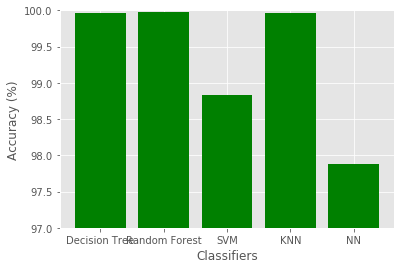

In [29]:
accuracy = [ac_DT*100, ac_RF*100, ac_SVM*100, ac_KNN*100, ac_NN*100]
classifier = ['Decision Tree', 'Random Forest', 'SVM', 'KNN', 'NN']
plot.style.use('ggplot')
x_pos = [i for i, _ in enumerate(classifier)]
low = min(accuracy)
high = max(accuracy)
plot.ylim([math.floor(low-0.2*(high-low)), math.floor(high+0.1*(high-low))])
plot.bar(x_pos, accuracy, color='green')
plot.xlabel("Classifiers")
plot.ylabel("Accuracy (%)")
plot.xticks(x_pos, classifier)
plot.show()

Plot a figure of execution time.

([<matplotlib.axis.XTick at 0x13bac1b38>,
 <a list of 5 Text xticklabel objects>)

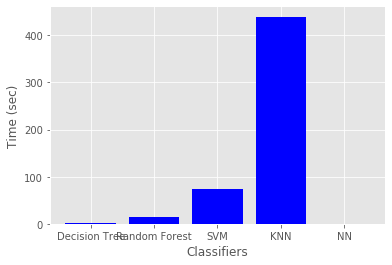

In [32]:
runtime = [rtime_DT, rtime_RF, rtime_SVM, rtime_KNN, rtime_NN]
x_pos = [i for i, _ in enumerate(classifier)]
plot.bar(x_pos, runtime, color='blue')
plot.xlabel("Classifiers")
plot.ylabel("Time (sec)")
plot.xticks(x_pos, classifier)